### 1. Preparation

Installing required libraries

In [1]:
#%pip install matplotlib
#%pip install pandas
#%pip install seaborn
#%pip install scipy
#%pip install scikit-learn
#%pip install statsmodels

Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### 2. Data Preprocessing

##### 2.a Import Dataset

In [3]:
df = pd.read_csv('customer_churn_data.csv', sep=';')
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.4,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.0,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


##### 2.b Dataset General Info

Checking data types

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   object 
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 78.3+ KB


Change TotalCharges into float64

In [5]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     829 non-null    float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


Check the number of rows and columns

In [7]:
df.shape #rows, cols

(1000, 10)

Check duplicated values

In [8]:
df.duplicated().sum()

np.int64(0)

Check null values

In [9]:
df.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges       171
TechSupport          0
Churn                0
dtype: int64

There are two columns that have Null values:

    a. InternetService (object) => we can impute this by creating new category
    b. TotalCharges (float64) => we can impute this by using median

#### 2.c Impute Missing Data

##### 2.c.1 InternetService

Create new category called "Not Mentioned"

In [10]:
df['InternetService'] = df['InternetService'].fillna('Not Mentioned')

<Axes: xlabel='InternetService', ylabel='count'>

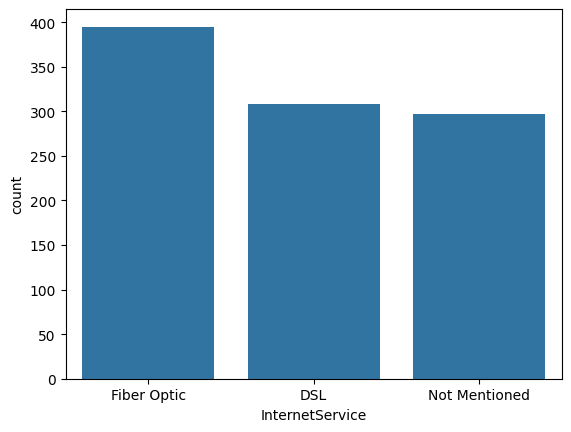

In [11]:
sns.countplot(df, x='InternetService')

**This method is actually a simplified version of SimpleImputer (without using sklearn library), for reference:**

https://www.youtube.com/watch?v=k3KrhjvaCq0

We can impute the "Not Mentioned" values using One Hot Encoder:

https://www.analyticsvidhya.com/blog/2021/04/how-to-handle-missing-values-of-categorical-variables/

or by using "simpleImputer":

https://www.analyticsvidhya.com/blog/2022/10/handling-missing-data-with-simpleimputer/

##### 2.c.2 TotalCharges

<Axes: xlabel='TotalCharges', ylabel='Count'>

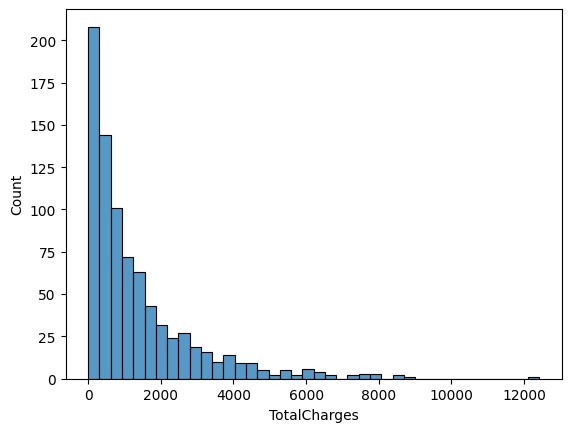

In [12]:
sns.histplot(df, x='TotalCharges')

The distribution is not normal, therefore we need to use median to impute the data

In [13]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [14]:
df['TotalCharges'].isnull().sum()

np.int64(0)

In [15]:
df.isnull().sum()

CustomerID         0
Age                0
Gender             0
Tenure             0
MonthlyCharges     0
ContractType       0
InternetService    0
TotalCharges       0
TechSupport        0
Churn              0
dtype: int64

#### 2.d Dataset Statistical Info

In [16]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1256.095960
std,288.819436,9.797741,18.89257,25.712083,1453.373048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,377.400000
50%,500.500000,45.000000,13.00000,74.060000,796.320000
75%,750.250000,51.000000,26.00000,96.102500,1509.257500
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


#### 2.e Drop 0.00 Float Values from TotalCharges

Is not possible for TotalCharges (which is accumulation of MonthlyCharges) to be 0

In [17]:
# df['TotalCharges'].drop(columns=df.columns[(df == 0.000000).any()])
df = df[df['TotalCharges'] != 0.00]

In [18]:
df['TotalCharges'].describe()

count      949.000000
mean      1323.599536
std       1461.672772
min         30.060000
25%        466.140000
50%        796.320000
75%       1563.520000
max      12416.250000
Name: TotalCharges, dtype: float64

In [19]:
df.shape

(949, 10)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 949 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       949 non-null    int64  
 1   Age              949 non-null    int64  
 2   Gender           949 non-null    object 
 3   Tenure           949 non-null    int64  
 4   MonthlyCharges   949 non-null    float64
 5   ContractType     949 non-null    object 
 6   InternetService  949 non-null    object 
 7   TotalCharges     949 non-null    float64
 8   TechSupport      949 non-null    object 
 9   Churn            949 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 81.6+ KB


#### 2.f Outlier Detection

In [21]:
#Outlier Detection using IQR

q1 = df['Tenure'].quantile(0.25)
q3 = df['Tenure'].quantile(0.75)

print(f'Q1 = {q1}')
print(f'Q3 = {q3}')

threshold = 1.5

IQR = q3-q1

tenure_outliers = df[(df['Tenure'] < q1 - threshold * IQR) | (df['Tenure'] > q3 + threshold * IQR)]
tenure_outliers

Q1 = 6.0
Q3 = 28.0


,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
18,19,35,Male,98,49.59,Two-Year,Fiber Optic,796.32,Yes,No
29,30,42,Male,62,97.66,Two-Year,Fiber Optic,6054.92,Yes,No
112,113,45,Female,88,51.73,Month-to-Month,Fiber Optic,4552.24,Yes,Yes
119,120,52,Female,66,80.96,Month-to-Month,Fiber Optic,5343.36,Yes,Yes
131,132,45,Female,62,86.22,Month-to-Month,DSL,5345.64,No,Yes
136,137,37,Female,82,98.11,Month-to-Month,Fiber Optic,796.32,No,Yes
138,139,53,Male,64,93.67,Month-to-Month,Fiber Optic,5994.88,No,Yes
155,156,37,Female,67,90.73,One-Year,DSL,6078.91,No,Yes
164,165,54,Male,101,54.78,Month-to-Month,Not Mentioned,5532.78,No,Yes
175,176,53,Female,66,100.12,Two-Year,Fiber Optic,6607.92,No,Yes


In [22]:
df['Tenure'].describe()

count    949.000000
mean      19.992624
std       18.860664
min        1.000000
25%        6.000000
50%       14.000000
75%       28.000000
max      122.000000
Name: Tenure, dtype: float64

C:\Users\RizkyBagaskara\AppData\Local\Temp\ipykernel_11024\3147014193.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Tenure'], shade=True, color='blue')


<Axes: xlabel='Tenure', ylabel='Density'>

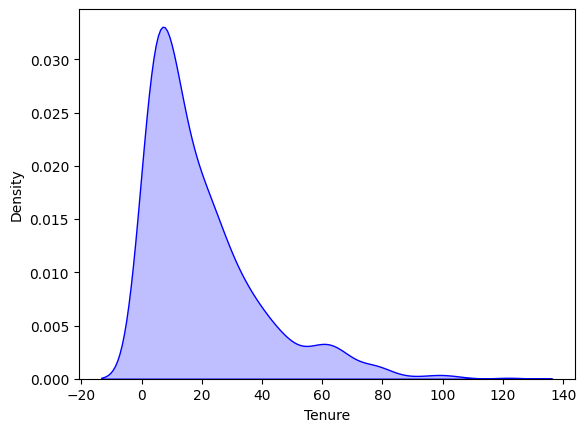

In [23]:
sns.kdeplot(df['Tenure'], shade=True, color='blue')

In [24]:
#Outlier Detection using IQR

q1 = df['TotalCharges'].quantile(0.25)
q3 = df['TotalCharges'].quantile(0.75)

print(f'Q1 = {q1}')
print(f'Q3 = {q3}')

threshold = 1.5

IQR = q3-q1

total_charges_outliers = df[(df['TotalCharges'] < q1 - threshold * IQR) | (df['TotalCharges'] > q3 + threshold * IQR)]
total_charges_outliers

Q1 = 466.14
Q3 = 1563.52


,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
24,25,39,Male,47,79.36,One-Year,DSL,3729.92,Yes,No
28,29,38,Female,34,100.38,Two-Year,DSL,3412.92,Yes,Yes
29,30,42,Male,62,97.66,Two-Year,Fiber Optic,6054.92,Yes,No
30,31,38,Male,34,102.27,Month-to-Month,DSL,3477.18,No,Yes
98,99,45,Male,44,111.09,Two-Year,Not Mentioned,4887.96,No,Yes
...,...,...,...,...,...,...,...,...,...,...
910,911,41,Male,39,82.70,Two-Year,DSL,3225.30,Yes,No
929,930,44,Male,44,95.72,Month-to-Month,Fiber Optic,4211.68,No,Yes
941,942,53,Male,64,98.99,One-Year,Fiber Optic,6335.36,No,Yes
952,953,32,Female,40,82.61,Month-to-Month,Not Mentioned,3304.40,No,Yes


In [25]:
df['TotalCharges'].describe()

count      949.000000
mean      1323.599536
std       1461.672772
min         30.060000
25%        466.140000
50%        796.320000
75%       1563.520000
max      12416.250000
Name: TotalCharges, dtype: float64

C:\Users\RizkyBagaskara\AppData\Local\Temp\ipykernel_11024\1154907917.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['TotalCharges'], shade=True, color='blue')


<Axes: xlabel='TotalCharges', ylabel='Density'>

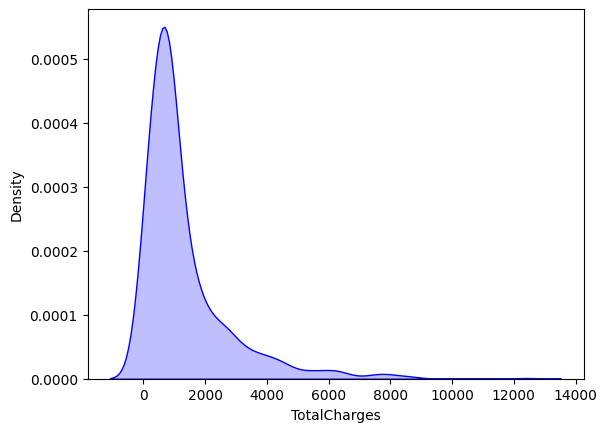

In [26]:
sns.kdeplot(df['TotalCharges'], shade=True, color='blue')

Better to use no transformation because it gets the highest score or considered to drop the outliers all together

**Drop the outliers**

In [27]:
# df = df.drop(tenure_outliers.index)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 949 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       949 non-null    int64  
 1   Age              949 non-null    int64  
 2   Gender           949 non-null    object 
 3   Tenure           949 non-null    int64  
 4   MonthlyCharges   949 non-null    float64
 5   ContractType     949 non-null    object 
 6   InternetService  949 non-null    object 
 7   TotalCharges     949 non-null    float64
 8   TechSupport      949 non-null    object 
 9   Churn            949 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 81.6+ KB


In [29]:
# df = df.drop(total_charges_outliers.index)

**Impute the value using median**

In [30]:
# #tenure
# median_tenure = df['Tenure'].median()

# #impute the data
# df.loc[tenure_outliers.index, 'Tenure'] = median_tenure

In [31]:
# # total charges
# total_charges_median = df['TotalCharges'].median()

# #impute the data
# df.loc[tenure_outliers.index, 'TotalCharges'] = total_charges_median

After the imputation:

<Axes: xlabel='Tenure', ylabel='Density'>

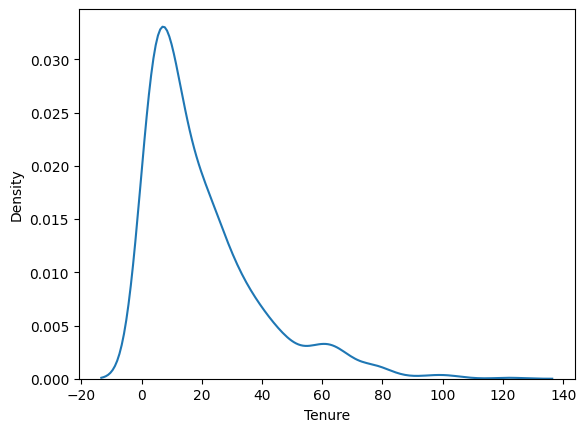

In [32]:
sns.kdeplot(df['Tenure'])

In [33]:
df['Tenure'].describe()

count    949.000000
mean      19.992624
std       18.860664
min        1.000000
25%        6.000000
50%       14.000000
75%       28.000000
max      122.000000
Name: Tenure, dtype: float64

In [34]:
# sns.kdeplot(df['TotalCharges'])

#### 2.g Data Transformation

Buat 2 copy untuk dataframe yang nanti akan diberikan transformasi berikut:
- Log transform
- Reciprocal transform

Abis itu nanti pas modeling dibandingin nilainya gimana buat ngeliat paling bagus yang mana

**Perlu diingat bahwa pada totalcharges dan tenure ada heterodiascity dan relationshipnya lebih ke non-linear, makanya dicoba untuk di transform pake beberapa metode untuk membandingkan mana yang lebih oke untuk menjelaskan relationship linear**

https://medium.com/womenintechnology/log-transformation-to-mitigate-the-effect-of-outliers-413cdd275495#:~:text=Log%20transformations%20are%20a%20powerful,the%20performance%20of%20statistical%20models, accesed on Oct 12th, 2024

In [35]:
#log transform
df['Tenure_log'] = np.log(df['Tenure'] + 10e6)

In [36]:
#reciprocal transform
df['Tenure_recp'] = 1 / df['Tenure']

In [37]:
df

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn,Tenure_log,Tenure_recp
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes,16.118096,0.250000
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes,16.118096,0.500000
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes,16.118096,0.125000
4,5,42,Male,32,69.01,Month-to-Month,Not Mentioned,2208.32,No,Yes,16.118099,0.031250
5,6,42,Female,16,119.75,Two-Year,DSL,1916.00,Yes,Yes,16.118097,0.062500
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,42,Male,41,37.14,Month-to-Month,Fiber Optic,1522.74,Yes,Yes,16.118100,0.024390
996,997,62,Male,9,80.93,Month-to-Month,Not Mentioned,796.32,No,Yes,16.118097,0.111111
997,998,51,Female,15,111.72,Month-to-Month,Fiber Optic,1675.80,Yes,Yes,16.118097,0.066667
998,999,39,Male,68,65.67,One-Year,Not Mentioned,4465.56,No,Yes,16.118102,0.014706


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 949 entries, 0 to 999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       949 non-null    int64  
 1   Age              949 non-null    int64  
 2   Gender           949 non-null    object 
 3   Tenure           949 non-null    int64  
 4   MonthlyCharges   949 non-null    float64
 5   ContractType     949 non-null    object 
 6   InternetService  949 non-null    object 
 7   TotalCharges     949 non-null    float64
 8   TechSupport      949 non-null    object 
 9   Churn            949 non-null    object 
 10  Tenure_log       949 non-null    float64
 11  Tenure_recp      949 non-null    float64
dtypes: float64(4), int64(3), object(5)
memory usage: 96.4+ KB


In [39]:
#square root transformation

# df['TotalCharges'] = np.sqrt(df['TotalCharges'])
# print("Dataset with Square Root Transformation TotalCharges:")
# df.head()

In [40]:
#cube root transformation

# df['Tenure'] = np.cbrt(df['Tenure'])
# print("Dataset with Cube Root Transformation Tenure:")
# df.head()

In [41]:
# sns.kdeplot(df['Tenure'])

In [42]:
# count_all_inf = ((df['TotalCharges'] == np.inf) | (df['TotalCharges'] == -np.inf)).sum()
# print(count_all_inf)

Drop the infinite value

In [43]:
# df['Tenure'].replace(-np.inf, np.nan, inplace=True)

# df.dropna(subset=['Tenure'], inplace=True)

kalau linear regression data yang di modelkan tidak diasumsikan berdistribusi normal, std errornya baru diasumsikan berdistribusi normal


lakukan transformation dari data tsb jika:
- lebih mudah diinterpretasi koefisiennya
- dapat menghasilkan hubungan lebih linier

jika hasilnya sama, berarti gausah, make aja yang awal/weight

salah satu alternatif untuk mengatasi variance adallah weighted

kalau negatif hasil coef modelnya bisa make rata2 dari kolom (kalau datanya kontinu) untuk dijadikan prediktor

dia gabisa ngubah nilai model score, tp bisa ngubah cara interpretasinya lebih mudah

#### 2.h Data Correlation

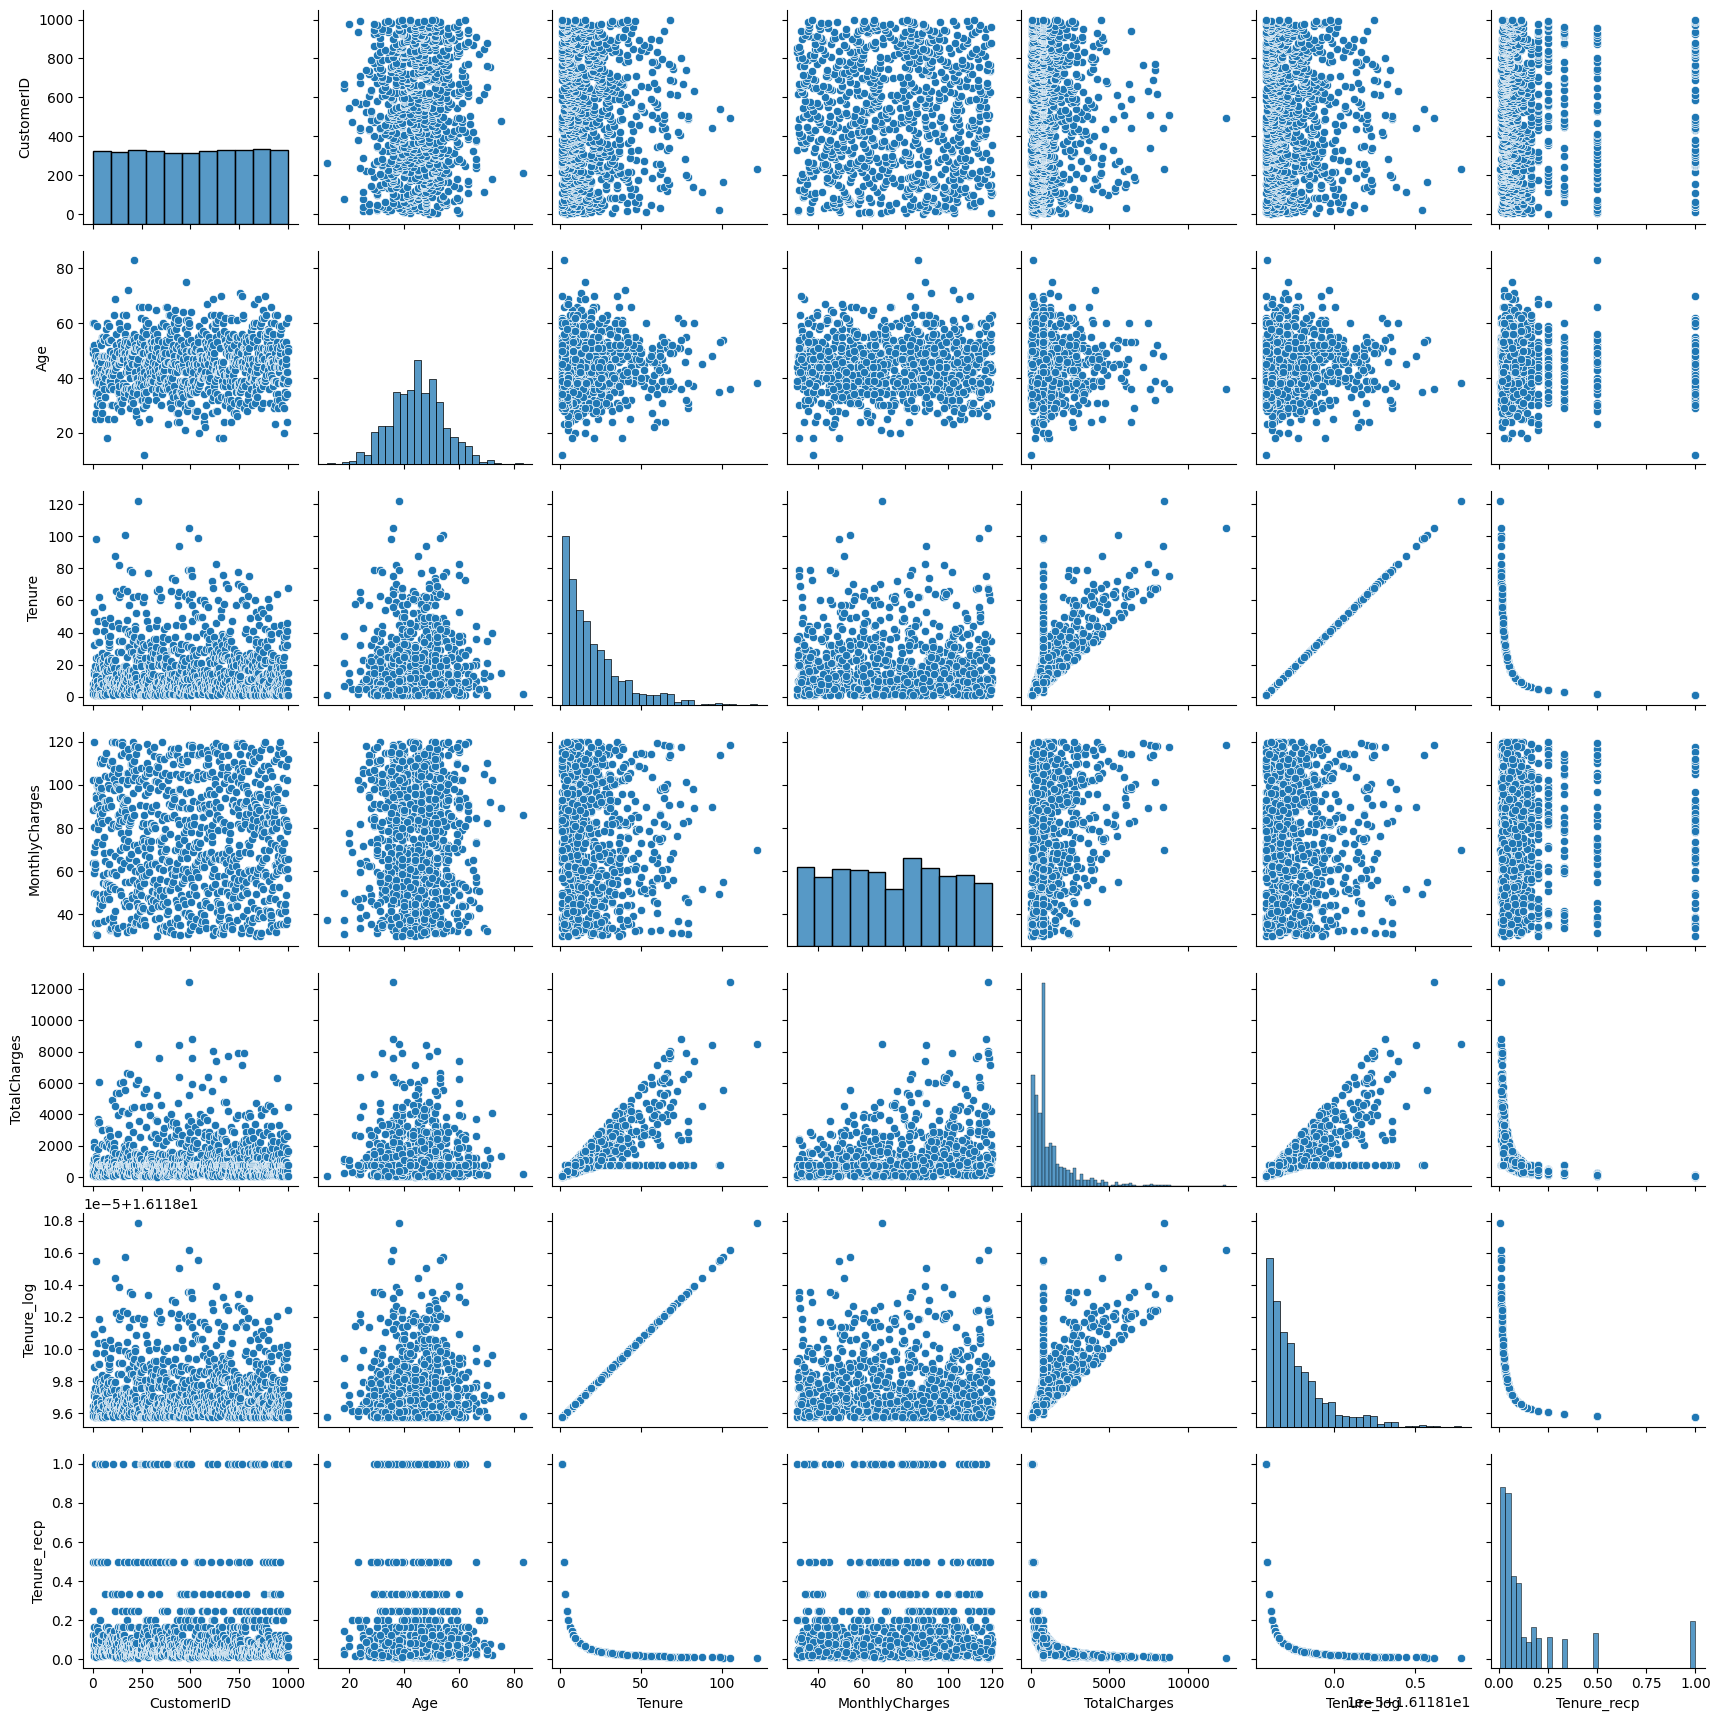

In [44]:
sns.pairplot(df)

Let's take a look at the correlation by using Heatmap:

In [45]:
numeric_columns = df.select_dtypes(np.number)
corr = numeric_columns.corr()
corr

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges,Tenure_log,Tenure_recp
CustomerID,1.000000,0.044168,-0.027258,-0.030086,-0.006895,-0.027258,0.014344
Age,0.044168,1.000000,0.002636,0.011051,-0.002707,0.002636,-0.019620
Tenure,-0.027258,0.002636,1.000000,-0.008563,0.784011,1.000000,-0.496383
MonthlyCharges,-0.030086,0.011051,-0.008563,1.000000,0.299249,-0.008563,0.007615
TotalCharges,-0.006895,-0.002707,0.784011,0.299249,1.000000,0.784011,-0.404362
Tenure_log,-0.027258,0.002636,1.000000,-0.008563,0.784011,1.000000,-0.496384
Tenure_recp,0.014344,-0.019620,-0.496383,0.007615,-0.404362,-0.496384,1.000000


<Axes: >

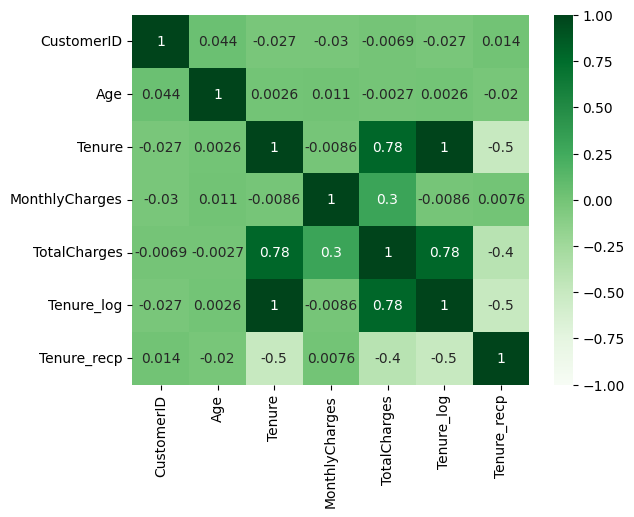

In [46]:
sns.heatmap(corr, annot=True, cmap="Greens", vmin=-1, vmax=1)

#### 2.i Labeling Churn Data

To make it easier for analysis, we can change the labeling of Churn column (which is Yes or No) into a binary value (0 and 1) using LabelEncoder from scikitlearn

In [47]:
df['Churn'].unique()

array(['Yes', 'No'], dtype=object)

In [48]:
from sklearn import preprocessing 

label_encoder = preprocessing.LabelEncoder() 

df['Churn'] = label_encoder.fit_transform(df['Churn'])

df['Churn'].unique()

array([1, 0])

### 3. Statistical Test

#### 3a. Business Question

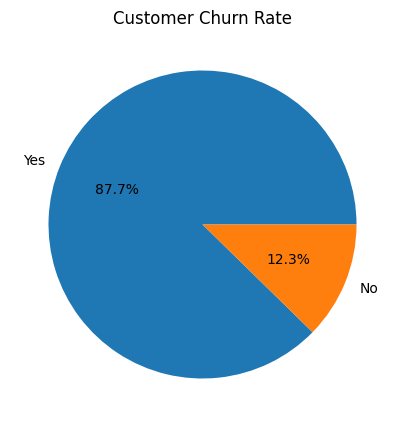

In [49]:
plt.figure(figsize=(10,5))

churn_counts = df['Churn'].value_counts()

labels = ['Yes', 'No']
sizes = [churn_counts[1], churn_counts[0]] 

plt.pie(sizes,labels=labels, autopct='%1.1f%%')
plt.title('Customer Churn Rate')
plt.show()

In [50]:
df['Age'].mean()

np.float64(44.65437302423604)

Based on the pie chart above, we can infer that the churn rate for this telecom company is 88.3%, which is way higher than the industry standard (31%). The average age of the consumer base is 44, which is middle aged. A sales manager assumes that the customer that older people tend to use internet less, therefore most of them churned.

#### 3b. Define Hypothesis

Based on the statement above, we can make a hypothesis that states:

**- H0: There is no significant difference in churn rate between younger and older consumers.**

**- H1: Older consumers have a significantly higher churn rate than younger consumers.**

Based on this hypotheses above, we will use two-tailed test (because the H1 != θ0)

#### 3c. Hypothesis Testing using T-Test

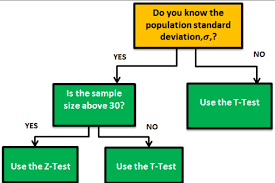

Why T-Test?
- Unknown standard deviation from population (not mentioned)

<Axes: xlabel='Age', ylabel='Density'>

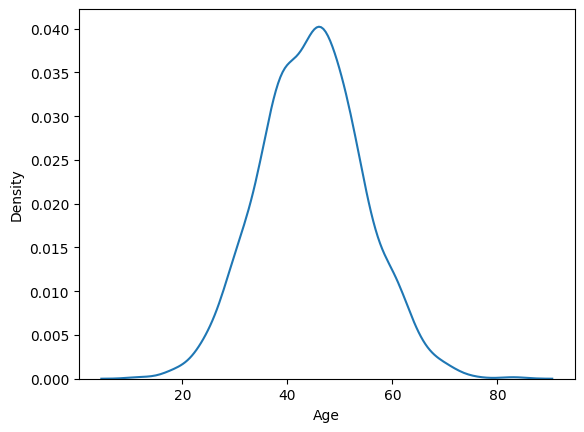

In [51]:
sns.kdeplot(df['Age'])

In [52]:
df['Age'].describe()

count    949.000000
mean      44.654373
std        9.751157
min       12.000000
25%       38.000000
50%       45.000000
75%       51.000000
max       83.000000
Name: Age, dtype: float64

##### 3.c.1. Calculate T-Statistics

Next is we want to compute t-statistics, with the formula being:

$$ t = \frac{\bar{x}-\mu_0}{\sqrt{s^2/n}}$$

- t-value tells us about how far the deviation sample mean $\bar{x}$ and population mean $\mu$ under assumption $H_0$ is true.
- We will use the ttest_1samp() function to calculate t-statistics and p-value for one-sample mean test

In [53]:
#create statistical test for T-Value
from scipy.stats import ttest_1samp

t_statistics, p_value = ttest_1samp(a = df['Age'], popmean=44, alternative='two-sided') #h1 != theta 0
print(f"t statistics: {t_statistics:.4f}")
print(f"p-value: {p_value:.4f}")

t statistics: 2.0673
p-value: 0.0390


##### 3.c.2. Defined Significance Level

Next is to find critical value based on alpha (significance level), which is 5% and because there is two regions (left and right), we divided the alpha into two:

In [54]:
from scipy.stats import t
t_crit = t.ppf(1-0.025, df = 949-1) #the dataset have 949 rows after dropping the 0.0 TotalCharges values
print(f'The critical value will be : ±{t_crit:.2f}')

The critical value will be : ±1.96


The critical region will be in:

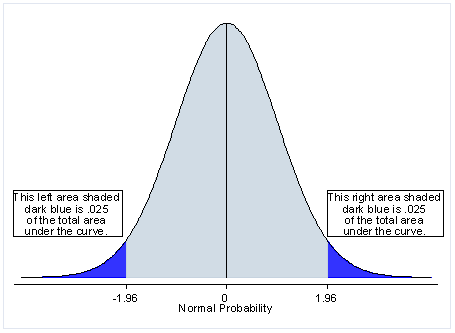

##### 3.c.3. Reject/Accept H0 based on Decision Rules

After that, we can create decision rules to either reject H0 or accept H0 based on t-statistic and p-value results

In [55]:
alpha = 0.05

if p_value<alpha:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the Null hypothesis")

Reject the null hypothesis


In [56]:
if t_statistics>t_crit or t_statistics <-t_crit:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the Null hypothesis")

Reject the null hypothesis


Visualize the critical region

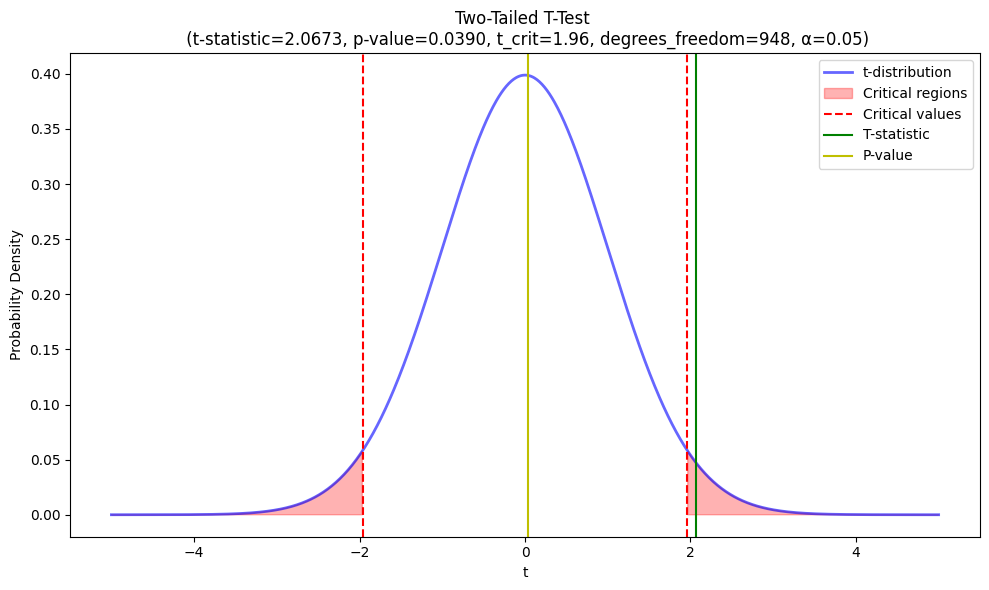

In [57]:
# #degrees of freedom
degree_freedom = 949-1

# Create the plot
plt.figure(figsize=(10, 6))

# Generate x values for the t-distribution
x = np.linspace(-5, 5, 1000)

# Plot the t-distribution
plt.plot(x, t.pdf(x, degree_freedom), 'b-', lw=2, alpha=0.6, label='t-distribution')

# Fill the critical regions
plt.fill_between(x, 0, t.pdf(x, degree_freedom), where=(x <= -t_crit) | (x >= t_crit), color='red', alpha=0.3, label='Critical regions')

# Add vertical lines for critical values and t-statistic
plt.axvline(-t_crit, color='r', linestyle='--', label='Critical values')
plt.axvline(t_crit, color='r', linestyle='--')
plt.axvline(t_statistics, color='g', linestyle='-', label='T-statistic')
plt.axvline(p_value, color='y', linestyle='-', label='P-value')

# Labeling
plt.title(f"Two-Tailed T-Test \n (t-statistic={t_statistics:.4f}, p-value={p_value:.4f}, t_crit={t_crit:.2f}, degrees_freedom={degree_freedom}, α={alpha})")
plt.xlabel('t')
plt.ylabel('Probability Density')

# Add text annotations
# plt.text(0, 0.2, f't-statistic: {t_statistics:.4f}\np-value: {p_value:.4f}', ha='center', va='center', 
#          bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

# Legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

#### 3d. Decision Results

**There is enough evidence to say that the customer who churned is on the older side**.

Manager should reconsider a new strategy to retain the consumer base for the older people.

### 4. Regression Model

#### 4a. Single Predictor (Linear Regression) using Weighted Regression (WLS)

**Find the association between TotalCharges and Tenure**

$$TotalCharges = β0 + β1Tenure$$

##### 4.a.1. Model Preparation

In [58]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [87]:
def get_results_table(regression_model):
    "Function to print Coefficient, Std Error, and R-Squared value from statsmodels"
    
    results_df = pd.DataFrame({
        'Coefficient': regression_model.params.values,
        'Std Error': regression_model.bse,
        'R-Squared': regression_model.rsquared
    }, index = regression_model.params.index)
    
    return results_df

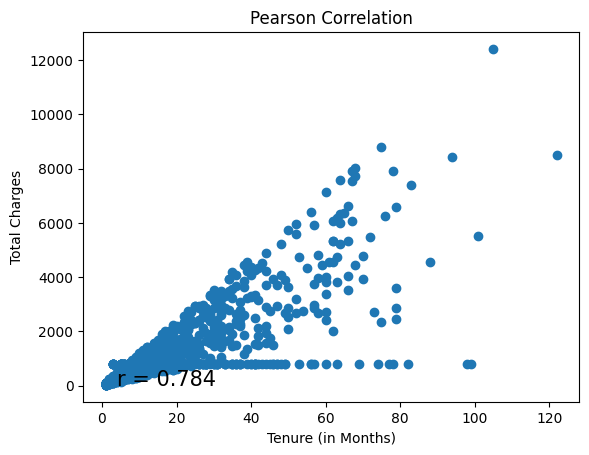

In [60]:
r = scipy.stats.pearsonr(x=df['TotalCharges'], y=df['Tenure'])[0]

# # sns.regplot(x='TotalCharges', y='Tenure', data=df)

plt.scatter(x=df['Tenure'], y=df['TotalCharges'])

plt.xlabel('Tenure (in Months)')
plt.ylabel('Total Charges')
plt.title('Pearson Correlation')

plt.text(4,10, 'r = ' + str(round(r, 4)), fontsize=15)


plt.show()

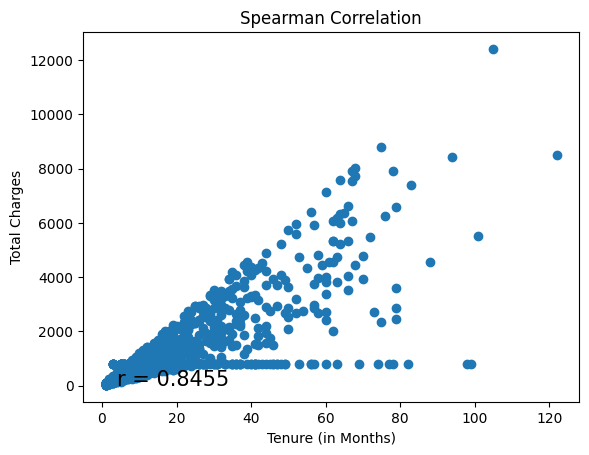

In [61]:
r = scipy.stats.spearmanr(a=df['TotalCharges'], b=df['Tenure'])[0]

# # sns.regplot(x='TotalCharges', y='Tenure', data=df)

plt.scatter(x=df['Tenure'], y=df['TotalCharges'])

plt.xlabel('Tenure (in Months)')
plt.ylabel('Total Charges')
plt.title('Spearman Correlation')

plt.text(4,10, 'r = ' + str(round(r, 4)), fontsize=15)

plt.show()

Based on the scatter plot above, the data have heteroscedasticity. One of the appropriate method to handle that is to use WLS (Weighted Linear Regression) by giving weights due to the high variances in the data.

Giving weights based on two columns above:

In [62]:
#set weight for weighted regression
weights = 1/(df['Tenure']**2)

In [63]:
df['weights'] = weights
df

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn,Tenure_log,Tenure_recp,weights
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,1,16.118096,0.250000,0.062500
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,1,16.118096,0.500000,0.250000
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,1,16.118096,0.125000,0.015625
4,5,42,Male,32,69.01,Month-to-Month,Not Mentioned,2208.32,No,1,16.118099,0.031250,0.000977
5,6,42,Female,16,119.75,Two-Year,DSL,1916.00,Yes,1,16.118097,0.062500,0.003906
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,42,Male,41,37.14,Month-to-Month,Fiber Optic,1522.74,Yes,1,16.118100,0.024390,0.000595
996,997,62,Male,9,80.93,Month-to-Month,Not Mentioned,796.32,No,1,16.118097,0.111111,0.012346
997,998,51,Female,15,111.72,Month-to-Month,Fiber Optic,1675.80,Yes,1,16.118097,0.066667,0.004444
998,999,39,Male,68,65.67,One-Year,Not Mentioned,4465.56,No,1,16.118102,0.014706,0.000216


In [64]:
# count_all_inf = ((df['weights'] == np.inf) | (df['weights'] == -np.inf)).sum()
# print(count_all_inf)

Remove infinite values

In [65]:
# df['weights'].replace(np.inf, np.nan, inplace=True)

# df.dropna(subset=['weights'], inplace=True)

In [66]:
df[['TotalCharges', 'Tenure']].var()
df[['TotalCharges', 'Tenure']].isnull().sum()

TotalCharges    0
Tenure          0
dtype: int64

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 949 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       949 non-null    int64  
 1   Age              949 non-null    int64  
 2   Gender           949 non-null    object 
 3   Tenure           949 non-null    int64  
 4   MonthlyCharges   949 non-null    float64
 5   ContractType     949 non-null    object 
 6   InternetService  949 non-null    object 
 7   TotalCharges     949 non-null    float64
 8   TechSupport      949 non-null    object 
 9   Churn            949 non-null    int64  
 10  Tenure_log       949 non-null    float64
 11  Tenure_recp      949 non-null    float64
 12  weights          949 non-null    float64
dtypes: float64(5), int64(4), object(4)
memory usage: 103.8+ KB


In [68]:
df['weights'].isnull().sum()

np.int64(0)

##### 4.a.2. Building Model

No transformation:

In [88]:
valid_weights = df['weights'].notnull()

wls_model = smf.wls('TotalCharges ~ Tenure', data=df, weights=valid_weights)

wls_results = wls_model.fit()

# print(wls_results.summary())

results_table = get_results_table(wls_results)
print(results_table)

           Coefficient  Std Error  R-Squared
Intercept   108.854377  42.955814   0.614673
Tenure       60.759667   1.563265   0.614673


With log transformation:

In [89]:
valid_weights = df['weights'].notnull()

wls_model_log = smf.wls('TotalCharges ~ Tenure_log', data=df, weights=valid_weights)

wls_results_log = wls_model_log.fit()

# print(wls_results_log.summary())

results_table = get_results_table(wls_results_log)
print(results_table)

             Coefficient     Std Error  R-Squared
Intercept  -9.793336e+09  2.519695e+08   0.614673
Tenure_log  6.075988e+08  1.563271e+07   0.614673


With reciprocal transformation:

In [90]:
valid_weights = df['weights'].notnull()

wls_model_recp = smf.wls('TotalCharges ~ Tenure_recp', data=df, weights=valid_weights)

wls_results_recp = wls_model_recp.fit()

# print(wls_results_recp.summary())

results_table = get_results_table(wls_results_recp)
print(results_table)

             Coefficient   Std Error  R-Squared
Intercept    1725.185478   52.501490   0.163508
Tenure_recp -2501.161387  183.834678   0.163508


##### 4.a.3. Plotting Model

No transformation:

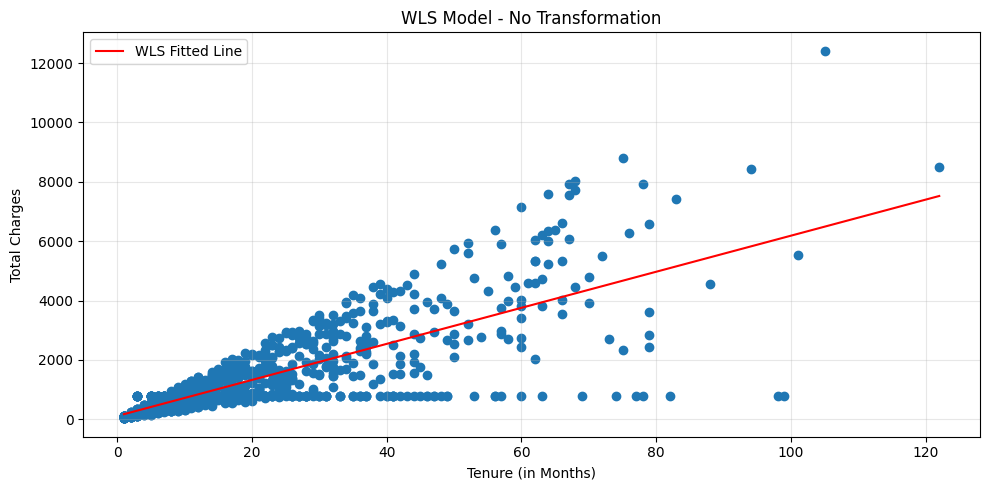

In [72]:
plt.figure(figsize=(10, 5))
plt.scatter(x=df['Tenure'], y=df['TotalCharges'])

# Generate points for the WLS regression line
tenure_range = np.linspace(df['Tenure'].min(), df['Tenure'].max(), 100)
charges_pred = wls_results.predict(exog=dict(Tenure=tenure_range))

# Plot the WLS regression line
plt.plot(tenure_range, charges_pred, color='red', label='WLS Fitted Line')

plt.xlabel('Tenure (in Months)')
plt.ylabel('Total Charges')
plt.title('WLS Model - No Transformation')
plt.legend()

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

With log transform:

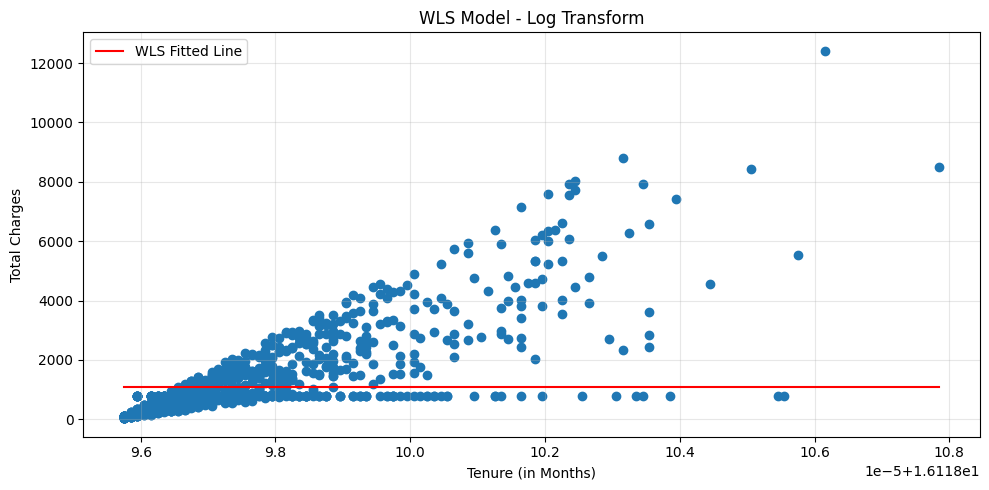

In [73]:
plt.figure(figsize=(10, 5))
plt.scatter(x=df['Tenure_log'], y=df['TotalCharges'])

# Generate points for the WLS regression line
tenure_range = np.linspace(df['Tenure_log'].min(), df['Tenure_log'].max(), 100)
charges_pred = wls_results.predict(exog=dict(Tenure=tenure_range))

# Plot the WLS regression line
plt.plot(tenure_range, charges_pred, color='red', label='WLS Fitted Line')

plt.xlabel('Tenure (in Months)')
plt.ylabel('Total Charges')
plt.title('WLS Model - Log Transform')
plt.legend()

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

With reciprocal transform:

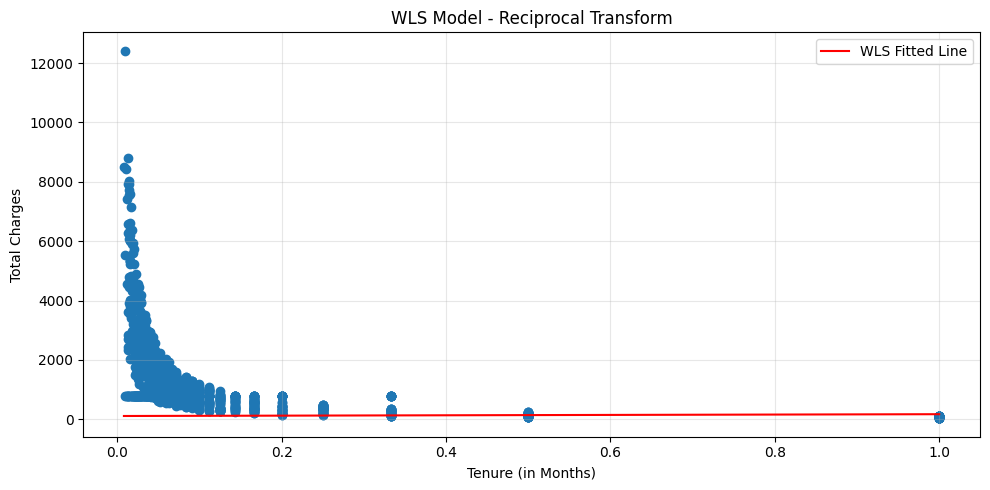

In [74]:
plt.figure(figsize=(10, 5))
plt.scatter(x=df['Tenure_recp'], y=df['TotalCharges'])

# Generate points for the WLS regression line
tenure_range = np.linspace(df['Tenure_recp'].min(), df['Tenure_recp'].max(), 100)
charges_pred = wls_results.predict(exog=dict(Tenure=tenure_range))

# Plot the WLS regression line
plt.plot(tenure_range, charges_pred, color='red', label='WLS Fitted Line')

plt.xlabel('Tenure (in Months)')
plt.ylabel('Total Charges')
plt.title('WLS Model - Reciprocal Transform')
plt.legend()

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Using OLS:

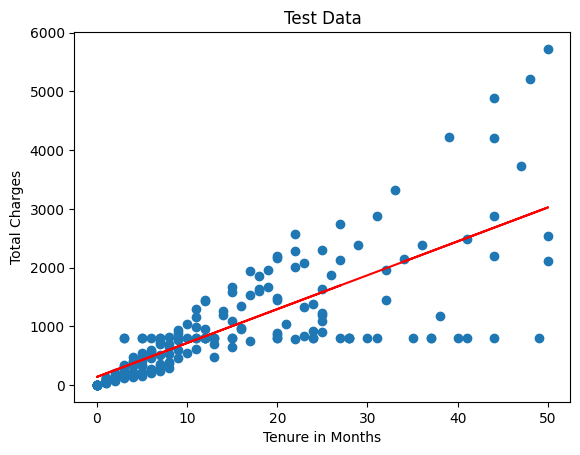

Based on the three models above, we can infer that No Transformation is best for this case. Because:
- Log Transform
    - While the R-squared value is pretty good, the intercept and coefficient value is too high
- Reciprocal Transform
    - Low R-Squared value
    - The data tends to create a exponential pattern

##### 4.a.4. Coefficient Interpretation (WLS)

Using the no transform model, the parameters will be:
$$TotalCharges = 108.85 + 60.75Tenure$$

By default, the customer who have 0 tenure will have an average of $108.85 for their Total Charge. Which doesn't make sense. For better interpretation, let's take the average tenure, which is 20 months. 

By using centering, we can get: 

$$TotalCharges = 108.85 + 60.75(Tenure - 20)$$

Mathematically, this can be viewed as:

$$TotalCharges = 108.85 + 60.75(Tenure - Tenurē)$$
$$TotalCharges = 108.85 - 60.75Tenurē +  60.75Tenure$$

**Based on the parameters above, the interpretation now has changed to the mean of TotalCharges whose customers have a tenure which is equal to the average of the sample**

http://www.med.mcgill.ca/epidemiology/joseph/courses/EPIB-621/centered_var.pdf, accesed on Oct 15th 2024

##### 4.a.5. Evaluate WLS Model

- Visualize the residual

https://www.statology.org/residual-plot-python/, accesed on Oct 12th, 2024

No Transformation

Text(0.5, 1.0, 'No Transformation')

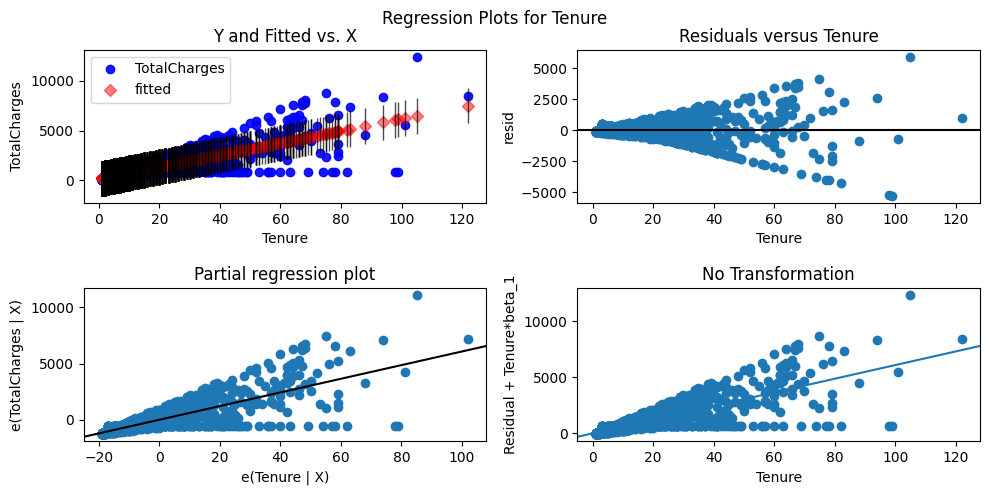

In [75]:
fig = plt.figure(figsize=(10,5))

fig = sm.graphics.plot_regress_exog(wls_results, 'Tenure', fig=fig)

plt.title('No Transformation')

Log Transformation

Text(0.5, 1.0, 'Log Transformation')

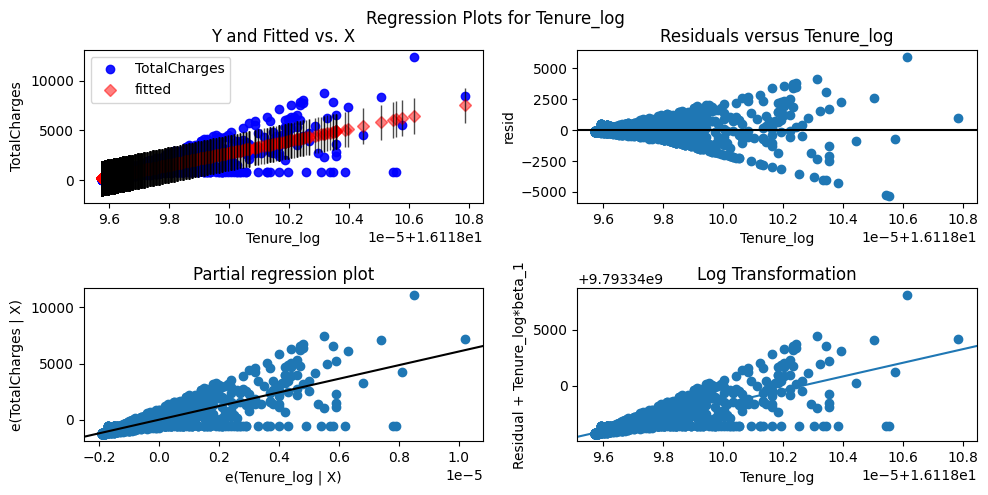

In [76]:
fig = plt.figure(figsize=(10,5))

fig = sm.graphics.plot_regress_exog(wls_results_log, 'Tenure_log', fig=fig)

plt.title('Log Transformation')

Reciprocal Transformation

Text(0.5, 1.0, 'Reciprocal Transformation')

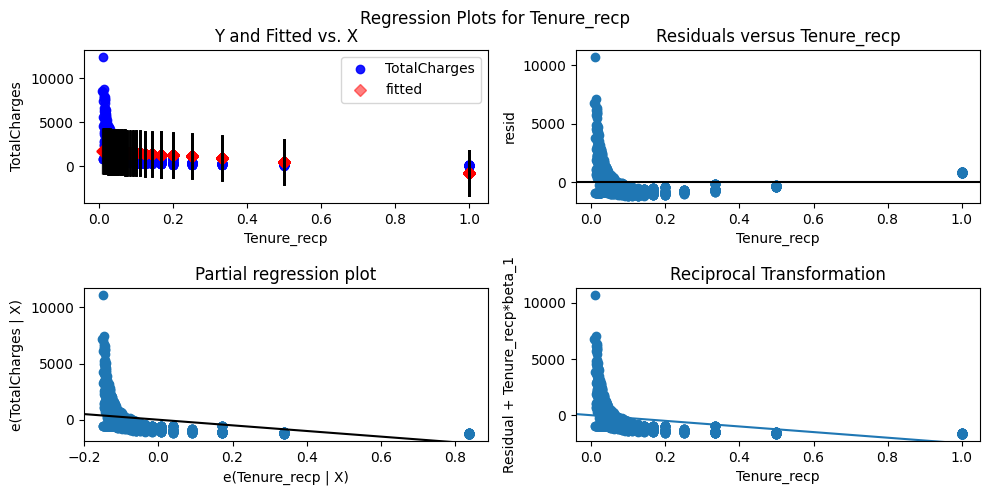

In [77]:
fig = plt.figure(figsize=(10,5))

fig = sm.graphics.plot_regress_exog(wls_results_recp, 'Tenure_recp', fig=fig)

plt.title('Reciprocal Transformation')

Heterodiascity affects the data because in the residual plot, the data points doesn't showed randomly

- Interpret R-squared value

In [78]:
print(f'R-Squared Value for No Transformation: {wls_results.rsquared:.4f}')
print(f'R-Squared Value for Log Transformation: {wls_results_log.rsquared:.4f}')
print(f'R-Squared Value for Reciprocal Transformation: {wls_results_recp.rsquared:.4f}')

R-Squared Value for No Transformation: 0.6147
R-Squared Value for Log Transformation: 0.6147
R-Squared Value for Reciprocal Transformation: 0.1635


#### 4b. Multiple Predictor (WLS)

**Find the association between TotalCharges with Tenure and MonthlyCharges**

$$TotalCharges = β0 + β1Tenure + β2MonthlyCharges $$

With interactions:

$$TotalCharges = β0 + β1Tenure + β2MonthlyCharges +β3.Tenure.MonthlyCharges $$

### 5. Conclusions and Recommendations

Future plans:

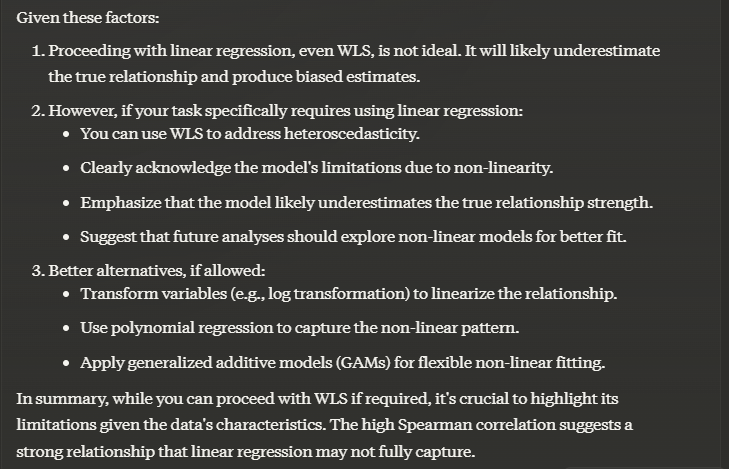

Suggest that future analyses should explore non-linear models for better fit